# Geek for geeks

https://www.geeksforgeeks.org/union-and-intersection-of-two-linked-list-using-hashing/

In [ ]:
# Python code for finding union and intersection of linkedList 


class linkedList: 
	def __init__(self): 
		self.head = None
		self.tail = None

	def insert(self, data): 
		if self.head is None: 
			self.head = Node(data) 
			self.tail = self.head 
		else: 
			self.tail.next = Node(data) 
			self.tail = self.tail.next


class Node: 
	def __init__(self, data): 
		self.data = data 
		self.next = None

# return the head of new list containing the intersection of 2 linkedList 


def findIntersection(head1, head2): 
	# creating a map 
	hashmap = {} 

	# traversing on first list 
	while(head1 != None): 
		data = head1.data 
		if(data not in hashmap.keys()): 
			hashmap[data] = 1
		head1 = head1.next

	# making a new linkedList 
	ans = linkedList() 
	while(head2 != None): 
		data = head2.data 
		if(data in hashmap.keys()): 
			# adding data to new list 
			ans.insert(data) 
		head2 = head2.next
	return ans.head 

# return the head of new list containing the union of 2 linkedList 


def union(head1, head2): 
	# creating a map 
	hashmap = {} 

	# traversing on first list 
	while(head1 != None): 
		data = head1.data 
		if(data not in hashmap.keys()): 
			hashmap[data] = 1
		head1 = head1.next

	while(head2 != None): 
		data = head2.data 
		if(data not in hashmap.keys()): 
			hashmap[data] = 1
		head2 = head2.next

	# making a new linkedList 
	ans = linkedList() 

	# traverse on hashmap 
	for key, value in hashmap.items(): 
		ans.insert(key) 

	return ans.head 


def printList(head): 
	while head: 
		print(head.data, end=' ') 
		head = head.next
	print() 


if __name__ == '__main__': 

	# first list 
	ll1 = linkedList() 
	ll1.insert(1) 
	ll1.insert(2) 
	ll1.insert(3) 
	ll1.insert(4) 
	ll1.insert(5) 

	# second list 
	ll2 = linkedList() 
	ll2.insert(1) 
	ll2.insert(3) 
	ll2.insert(5) 
	ll2.insert(6) 

	print("First list is ") 
	printList(ll1.head) 

	print("Second list is ") 
	printList(ll2.head) 

	print("Intersection list is") 
	printList(findIntersection(ll1.head, ll2.head)) 

	print("Union list is ") 
	printList(union(ll1.head, ll2.head)) 


# This code is contributed by Arpit Jain 


# Hash Map

In [ ]:
class LinkedListNode:
    
    def __init__(self, key, value):
        self.key = key
        self.value = value
        self.next = None


class HashMap:
    
    def __init__(self, initial_size = 15):
        self.bucket_array = [None for _ in range(initial_size)]
        self.p = 31
        self.num_entries = 0
        self.load_factor = 0.7
        
    def put(self, key, value):
        bucket_index = self.get_bucket_index(key)

        new_node = LinkedListNode(key, value)
        head = self.bucket_array[bucket_index]

        # check if key is already present in the map, and update it's value
        while head is not None:
            if head.key == key:
                head.value = value
                return
            head = head.next

        # key not found in the chain --> create a new entry and place it at the head of the chain
        head = self.bucket_array[bucket_index]
        new_node.next = head
        self.bucket_array[bucket_index] = new_node
        self.num_entries += 1
        
        # check for load factor
        current_load_factor = self.num_entries / len(self.bucket_array)
        if current_load_factor > self.load_factor:
            self.num_entries = 0
            self._rehash()
        
    def get(self, key):
        bucket_index = self.get_hash_code(key)
        head = self.bucket_array[bucket_index]
        while head is not None:
            if head.key == key:
                return head.value
            head = head.next
        return None
        
    def get_bucket_index(self, key):
        bucket_index = self.get_hash_code(key)
        return bucket_index
    
    def get_hash_code(self, key):
        key = str(key)
        num_buckets = len(self.bucket_array)
        current_coefficient = 1
        hash_code = 0
        for character in key:
            hash_code += ord(character) * current_coefficient
            hash_code = hash_code % num_buckets                       # compress hash_code
            current_coefficient *= self.p
            current_coefficient = current_coefficient % num_buckets   # compress coefficient
        return hash_code % num_buckets                                # one last compression before returning
    
    def size(self):
        return self.num_entries

    def _rehash(self):
        old_num_buckets = len(self.bucket_array)
        old_bucket_array = self.bucket_array
        num_buckets = 2 * old_num_buckets
        self.bucket_array = [None for _ in range(num_buckets)]

        for head in old_bucket_array:
            while head is not None:
                key = head.key
                value = head.value
                self.put(key, value)         # we can use our put() method to rehash
                head = head.next
                
    def delete(self, key):
        bucket_index = self.get_bucket_index(key)
        head = self.bucket_array[bucket_index]

        previous = None
        while head is not None:
            if head.key == key:
                if previous is None:
                    self.bucket_array[bucket_index] = head.next
                else:
                    previous.next = head.next
                self.num_entries -= 1
                return
            else:
                previous = head
                head = head.next

    
    # Helper function to see the hashmap
    def __repr__(self):
        output = "\nLet's view the hash map:"

        node = self.bucket_array
        for bucket_index, node in enumerate(self.bucket_array):
            if node is None:
                output += '\n[{}] '.format(bucket_index)
            else:
                output += '\n[{}]'.format(bucket_index)
                while node is not None:
                    output += ' ({} , {}) '.format(node.key, node.value)
                    if node.next is not None:
                        output += ' --> '
                    node = node.next
                    
        return output

# Linked List (Template)

In [2]:
class Node:
    def __init__(self, value):
        self.value = value
        self.next = None

    def __repr__(self):
        return str(self.value)


class LinkedList:
    def __init__(self):
        self.head = None

    def __str__(self):
        cur_head = self.head
        out_string = ""
        while cur_head:
            out_string += str(cur_head.value) + " -> "
            cur_head = cur_head.next
        return out_string


    def append(self, value):

        if self.head is None:
            self.head = Node(value)
            return

        node = self.head
        while node.next:
            node = node.next

        node.next = Node(value)

    def size(self):
        size = 0
        node = self.head
        while node:
            size += 1
            node = node.next

        return size

# Draft

## Code

### Linked List

In [4]:
class Node:
    def __init__(self, value):
        self.value = value
        self.next = None

    def __repr__(self):
        return str(self.value)

In [64]:
class LinkedList:
    
    def __init__(self):
        self.head = None

    def append(self, value):

        node = Node(value)
        
        if self.head is None:
            self.head = node
            return
            
        node.next = self.head
        self.head = node

    def size(self):
        size = 0
        node = self.head
        while node:
            size += 1
            node = node.next

        return size

    def from_list(self, values):
        self.head = Node(values[0])

        previous_node = self.head
        for value in values[1:]:
            node = Node(value)
            previous_node.next = node
            previous_node = node
            
        return
    
    def to_list(self):
        values = []
        node = self.head
        while node:
            values.append(node.value)
            node = node.next
        return values
    
    def __str__(self):
        values = self.to_list()
        out_string = "["
        for value in sorted(values):
            out_string += str(value) + " "
        out_string = out_string[:-1]
        out_string += "]"
        return out_string


### Hash Map

In [65]:
class ChainNode:
    
    def __init__(self, key, value):
        self.key = key
        self.value = value
        self.next = None


In [66]:
class HashMap:
    
    def __init__(self, initial_size=15):
        self.bucket_array = [None for _ in range(initial_size)]
        self.p = 31
        self.num_entries = 0
        self.load_factor = 0.7
        
    def put(self, key, value):
        bucket_index = self.get_bucket_index(key)

        new_node = ChainNode(key, value)
        head = self.bucket_array[bucket_index]

        # check if key is already present in the map, and update it's value
        while head is not None:
            if head.key == key:
                head.value = value
                return
            head = head.next

        # key not found in the chain --> create a new entry and place it at the head of the chain
        head = self.bucket_array[bucket_index]
        new_node.next = head
        self.bucket_array[bucket_index] = new_node
        self.num_entries += 1
        
        # check for load factor
        current_load_factor = self.num_entries / len(self.bucket_array)
        if current_load_factor > self.load_factor:
            self.num_entries = 0
            self._rehash()
        
    def get(self, key):
        bucket_index = self.get_hash_code(key)
        head = self.bucket_array[bucket_index]
        while head is not None:
            if head.key == key:
                return head.value
            head = head.next
        return None
        
    def get_bucket_index(self, key):
        bucket_index = self.get_hash_code(key)
        return bucket_index
    
    def get_hash_code(self, key):
        key = str(key)
        num_buckets = len(self.bucket_array)
        current_coefficient = 1
        hash_code = 0
        for character in key:
            hash_code += ord(character) * current_coefficient
            hash_code = hash_code % num_buckets                       # compress hash_code
            current_coefficient *= self.p
            current_coefficient = current_coefficient % num_buckets   # compress coefficient
        return hash_code % num_buckets                                # one last compression before returning
    
    def size(self):
        return self.num_entries

    def _rehash(self):
        old_num_buckets = len(self.bucket_array)
        old_bucket_array = self.bucket_array
        num_buckets = 2 * old_num_buckets
        self.bucket_array = [None for _ in range(num_buckets)]

        for head in old_bucket_array:
            while head is not None:
                key = head.key
                value = head.value
                self.put(key, value)         # we can use our put() method to rehash
                head = head.next
                
    def delete(self, key):
        bucket_index = self.get_bucket_index(key)
        head = self.bucket_array[bucket_index]

        previous = None
        while head is not None:
            if head.key == key:
                if previous is None:
                    self.bucket_array[bucket_index] = head.next
                else:
                    previous.next = head.next
                self.num_entries -= 1
                return
            else:
                previous = head
                head = head.next

    
    # Helper function to see the hashmap
    def __repr__(self):
        output = "\nLet's view the hash map:"

        node = self.bucket_array
        for bucket_index, node in enumerate(self.bucket_array):
            if node is None:
                output += '\n[{}] '.format(bucket_index)
            else:
                output += '\n[{}]'.format(bucket_index)
                while node is not None:
                    output += ' ({} , {}) '.format(node.key, node.value)
                    if node.next is not None:
                        output += ' --> '
                    node = node.next
                    
        return output

## Union

In [67]:
def union(llist_1, llist_2):
    llist_union = LinkedList()
    hash_map = HashMap()

    # Iterate first linked list
    node = llist_1.head
    while node is not None:
        
        value = node.value
        if hash_map.get(value) is None:
            hash_map.put(value, value)
            llist_union.append(value)

        node = node.next

    node = llist_2.head
    while node is not None:
        
        value = node.value
        if hash_map.get(value) is None:
            hash_map.put(value, value)
            llist_union.append(value)

        node = node.next

    return llist_union


In [68]:
N = 1000000
n_max = 1000000

import numpy as np
import time

def compute_union(N, n_max):
    
    list_1 = np.random.randint(low=0, high=n_max, size=N)
    list_2 = np.random.randint(low=0, high=n_max, size=N)

    llist_1 = LinkedList()
    llist_2 = LinkedList()

    llist_1.from_list(list_1.tolist())
    llist_2.from_list(list_2.tolist())
    
    start = time.time()
    llist_union = union(llist_1, llist_2)
    end = time.time()

    # if len(np.union1d(element_1, element_2)) != len(llist_union.to_list()):
    #     print("Error!")
    
    return end - start


300000
350000
400000
450000
500000
550000
600000
650000
700000
750000
800000
850000
900000
950000


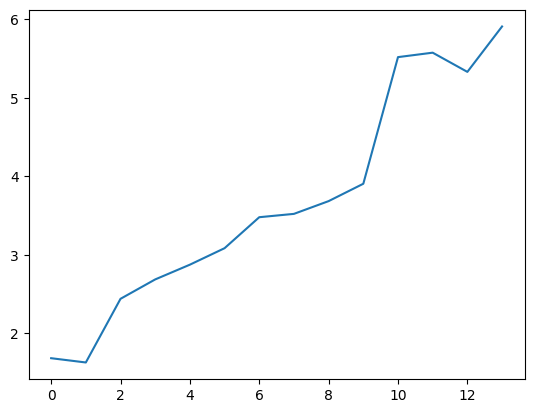

In [139]:
import matplotlib.pyplot as plt

times_l = []

for n in range(300000, 1000000, 50000):
    print(n)
    
    lapsed_time = compute_union(n, n)

    times_l.append(lapsed_time)

plt.plot(times_l)

In [137]:
times_l

[1.453765869140625, 3.339735984802246, 5.836325168609619]

## Intersection

In [69]:
def intersection(llist_1, llist_2):
    llist = LinkedList()
    hash_map = HashMap()

    # Iterate first linked list
    node = llist_1.head
    while node is not None:
        
        value = node.value
        count = hash_map.get(value)
        if count is None:
            hash_map.put(value, 1)
            
        node = node.next

    # Iterate second linked list
    node = llist_2.head
    while node is not None:  
        
        value = node.value
        count = hash_map.get(value)
        print(value, count)
        
        if count == 1:
            hash_map.put(value, 2)
            llist.append(value)            
            
        node = node.next

    return llist

In [70]:

import numpy as np

list_1 = np.array([2, 3, 3, 4, 4, 6, 6, 21, 35, 65])
list_2 = np.array([1, 1, 4, 6, 6, 9, 11, 21, 32])

llist_1 = LinkedList()
llist_2 = LinkedList()

llist_1.from_list(list_1.tolist())
llist_2.from_list(list_2.tolist())

print(llist_1)
print(llist_2)
print(np.intersect1d(list_1, list_2))

[2 3 3 4 4 6 6 21 35 65]
[1 1 4 6 6 9 11 21 32]
[ 4  6 21]


In [72]:
llist = intersection(llist_1, llist_2)

print(llist)

[2 3 3 4 4 6 6 21 35 65]

Let's view the hash map:
[0] 
[1] 
[2] (65 , 1) 
[3] 
[4] 
[5] (2 , 1) 
[6] (3 , 1) 
[7] (4 , 1) 
[8] 
[9] (21 , 1)  -->  (6 , 1) 
[10] 
[11] 
[12] 
[13] 
[14] (35 , 1) 
1 None
1 None
4 1
6 1
6 2
9 None
11 None
21 1
32 None

Let's view the hash map:
[0] 
[1] 
[2] (65 , 1) 
[3] 
[4] 
[5] (2 , 1) 
[6] (3 , 1) 
[7] (4 , 2) 
[8] 
[9] (21 , 2)  -->  (6 , 2) 
[10] 
[11] 
[12] 
[13] 
[14] (35 , 1) 
[4 6 21]


In [63]:
node = llist.head
while node:
    print(node.value)
    node = node.next

21
6
4
4
